WBC/RBC - Classifier

In [34]:

from tensorflow.keras.preprocessing import image_dataset_from_directory



data_train = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClassifier/',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=64,
                                        image_size=(150,150),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.2,
                                        subset='training')
data


Found 38219 files belonging to 2 classes.
Using 30576 files for training.


<BatchDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [35]:
data_val = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClassifier/',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=64,
                                        image_size=(150,150),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.2,
                                        subset='validation')

Found 38219 files belonging to 2 classes.
Using 7643 files for validation.


In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = models.Sequential()
model.add(Rescaling(1./255, input_shape=(150,150,3)))
model.add(layers.Conv2D(8, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_11 (Rescaling)     (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 8)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 36, 36, 16)      

In [40]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()

model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=['accuracy','Recall'])

In [41]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(data_train,
                    epochs=15,
                    callbacks=es,
                    validation_data=data_val)

Epoch 1/15
478/478 [==============================] - 98s 204ms/step - loss: 0.1688 - accuracy: 0.9962 - recall: 0.9871 - val_loss: 0.1364 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 2/15
478/478 [==============================] - 97s 204ms/step - loss: 0.1205 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0991 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 3/15
478/478 [==============================] - 97s 203ms/step - loss: 0.0883 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0733 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 4/15
478/478 [==============================] - 97s 203ms/step - loss: 0.0658 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0551 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 5/15
478/478 [==============================] - 98s 204ms/step - loss: 0.0500 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0422 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 6/15
478/478 [==============================] - 100s 210ms/step - loss: 0.0387 

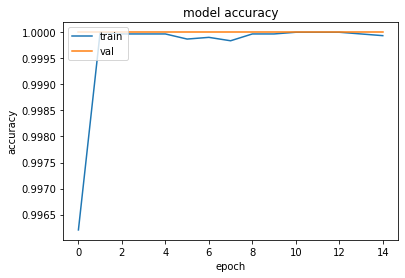

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

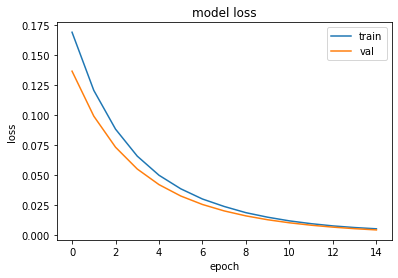

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()